# Loading the Libraries and Data

In [15]:
import pandas as pd


# Load Dataset

In [59]:
url = 'https://raw.githubusercontent.com/divaamahajan/K-Most-Popular-Words/main/logs/logs.csv'
df = pd.read_csv(url)
df.head()

,Top k,Data Structure,File division,Algorithm Approach,Filename,File Size (GB),Chunk Size (MB),Running time (seconds),Memory usage (MB),CPU utilization %
0,5,counter,chunks,multithread,data_300MB.txt,0.29,5.0,11.48,462.14,5.8
1,5,counter,chunks,multithread,data_300MB.txt,0.29,10.0,11.55,664.78,7.0
2,5,counter,chunks,multithread,data_300MB.txt,0.29,20.0,11.54,786.53,3.7
3,5,counter,chunks,multithread,data_300MB.txt,0.29,40.0,11.28,991.03,3.0
4,5,counter,chunks,multithread,data_2.5GB.txt,2.31,5.0,111.39,1328.56,3.5


# Data Preprocessing

In [45]:
df.describe()

,Data Structure,Algorithm Approach,Chunk Size (MB),Running time (seconds),Memory usage (MB),CPU utilization %,filename
count,56.000000,56.000000,53.000000,56.000000,56.000000,56.000000,56.000000
mean,0.964286,1.321429,55.950377,59.684643,936.386964,3.285714,1.339286
std,0.952781,0.876089,139.197347,88.281849,589.440176,2.418522,0.900036
min,0.000000,0.000000,2.290000,1.590000,29.670000,1.200000,0.000000
25%,0.000000,0.000000,10.000000,1.992500,532.597500,1.975000,1.000000
50%,1.000000,2.000000,20.000000,15.150000,796.575000,2.500000,1.000000
75%,2.000000,2.000000,40.000000,110.895000,1236.910000,3.700000,2.000000
max,3.000000,2.000000,734.090000,510.100000,2497.410000,13.600000,3.000000


In [60]:

# identify rows where chunk size is 0
mask = df['Chunk Size (MB)'] == 0

# convert file size to MB for matching rows
converted_values = df.loc[mask, 'File Size (GB)'] * 1024

# update the DataFrame
df.loc[mask, 'Chunk Size (MB)'] = converted_values.round(2)

In [61]:
# drop 'Top k' and 'Filename' columns
df = df.drop(columns=['Top k', 'File Size (GB)', 'File division'])

In [62]:
df.head(2)

,Data Structure,Algorithm Approach,Filename,Chunk Size (MB),Running time (seconds),Memory usage (MB),CPU utilization %
0,counter,multithread,data_300MB.txt,5.0,11.48,462.14,5.8
1,counter,multithread,data_300MB.txt,10.0,11.55,664.78,7.0


In [63]:
# create dictionaries to map numeric codes to text values
data_structure_dict = {code: value for code, value in enumerate(df['Data Structure'].astype('category').cat.categories)}
algorithm_approach_dict = {code: value for code, value in enumerate(df['Algorithm Approach'].astype('category').cat.categories)}# convert 'Data Structure', 'File division', and 'Algorithm Approach' to numeric values
filename_dict = {code: value for code, value in enumerate(df['Filename'].astype('category').cat.categories)}# convert 'Data Structure', 'File division', and 'Algorithm Approach' to numeric values

In [64]:
df['Data Structure'] = df['Data Structure'].astype('category').cat.codes
df['Algorithm Approach'] = df['Algorithm Approach'].astype('category').cat.codes
df['Filename'] = df['Filename'].astype('category').cat.codes

In [65]:
df.head()

,Data Structure,Algorithm Approach,Filename,Chunk Size (MB),Running time (seconds),Memory usage (MB),CPU utilization %
0,0,1,2,5.0,11.48,462.14,5.8
1,0,1,2,10.0,11.55,664.78,7.0
2,0,1,2,20.0,11.54,786.53,3.7
3,0,1,2,40.0,11.28,991.03,3.0
4,0,1,1,5.0,111.39,1328.56,3.5


In [66]:
df_data_structure = pd.DataFrame.from_dict(data_structure_dict, orient='index', columns=['Data Structure'])
df_algorithm_approach = pd.DataFrame.from_dict(algorithm_approach_dict, orient='index', columns=['Algorithm Approach'])
df_filename = pd.DataFrame.from_dict(filename_dict, orient='index', columns=['Filename'])


# Correltion Analysis

In [67]:
# Compute the correlation matrix
corr_matrix = df.corr()
corr_matrix

,Data Structure,Algorithm Approach,Filename,Chunk Size (MB),Running time (seconds),Memory usage (MB),CPU utilization %
Data Structure,1.000000,0.144694,-0.388457,0.124727,0.250249,0.010444,0.232539
Algorithm Approach,0.144694,1.000000,0.205055,-0.032563,0.049968,-0.299246,0.136070
Filename,-0.388457,0.205055,1.000000,-0.293169,-0.682730,-0.351716,-0.280890
Chunk Size (MB),0.124727,-0.032563,-0.293169,1.000000,0.527733,-0.168244,0.055077
Running time (seconds),0.250249,0.049968,-0.682730,0.527733,1.000000,0.036058,0.125397
Memory usage (MB),0.010444,-0.299246,-0.351716,-0.168244,0.036058,1.000000,0.116613
CPU utilization %,0.232539,0.136070,-0.280890,0.055077,0.125397,0.116613,1.000000


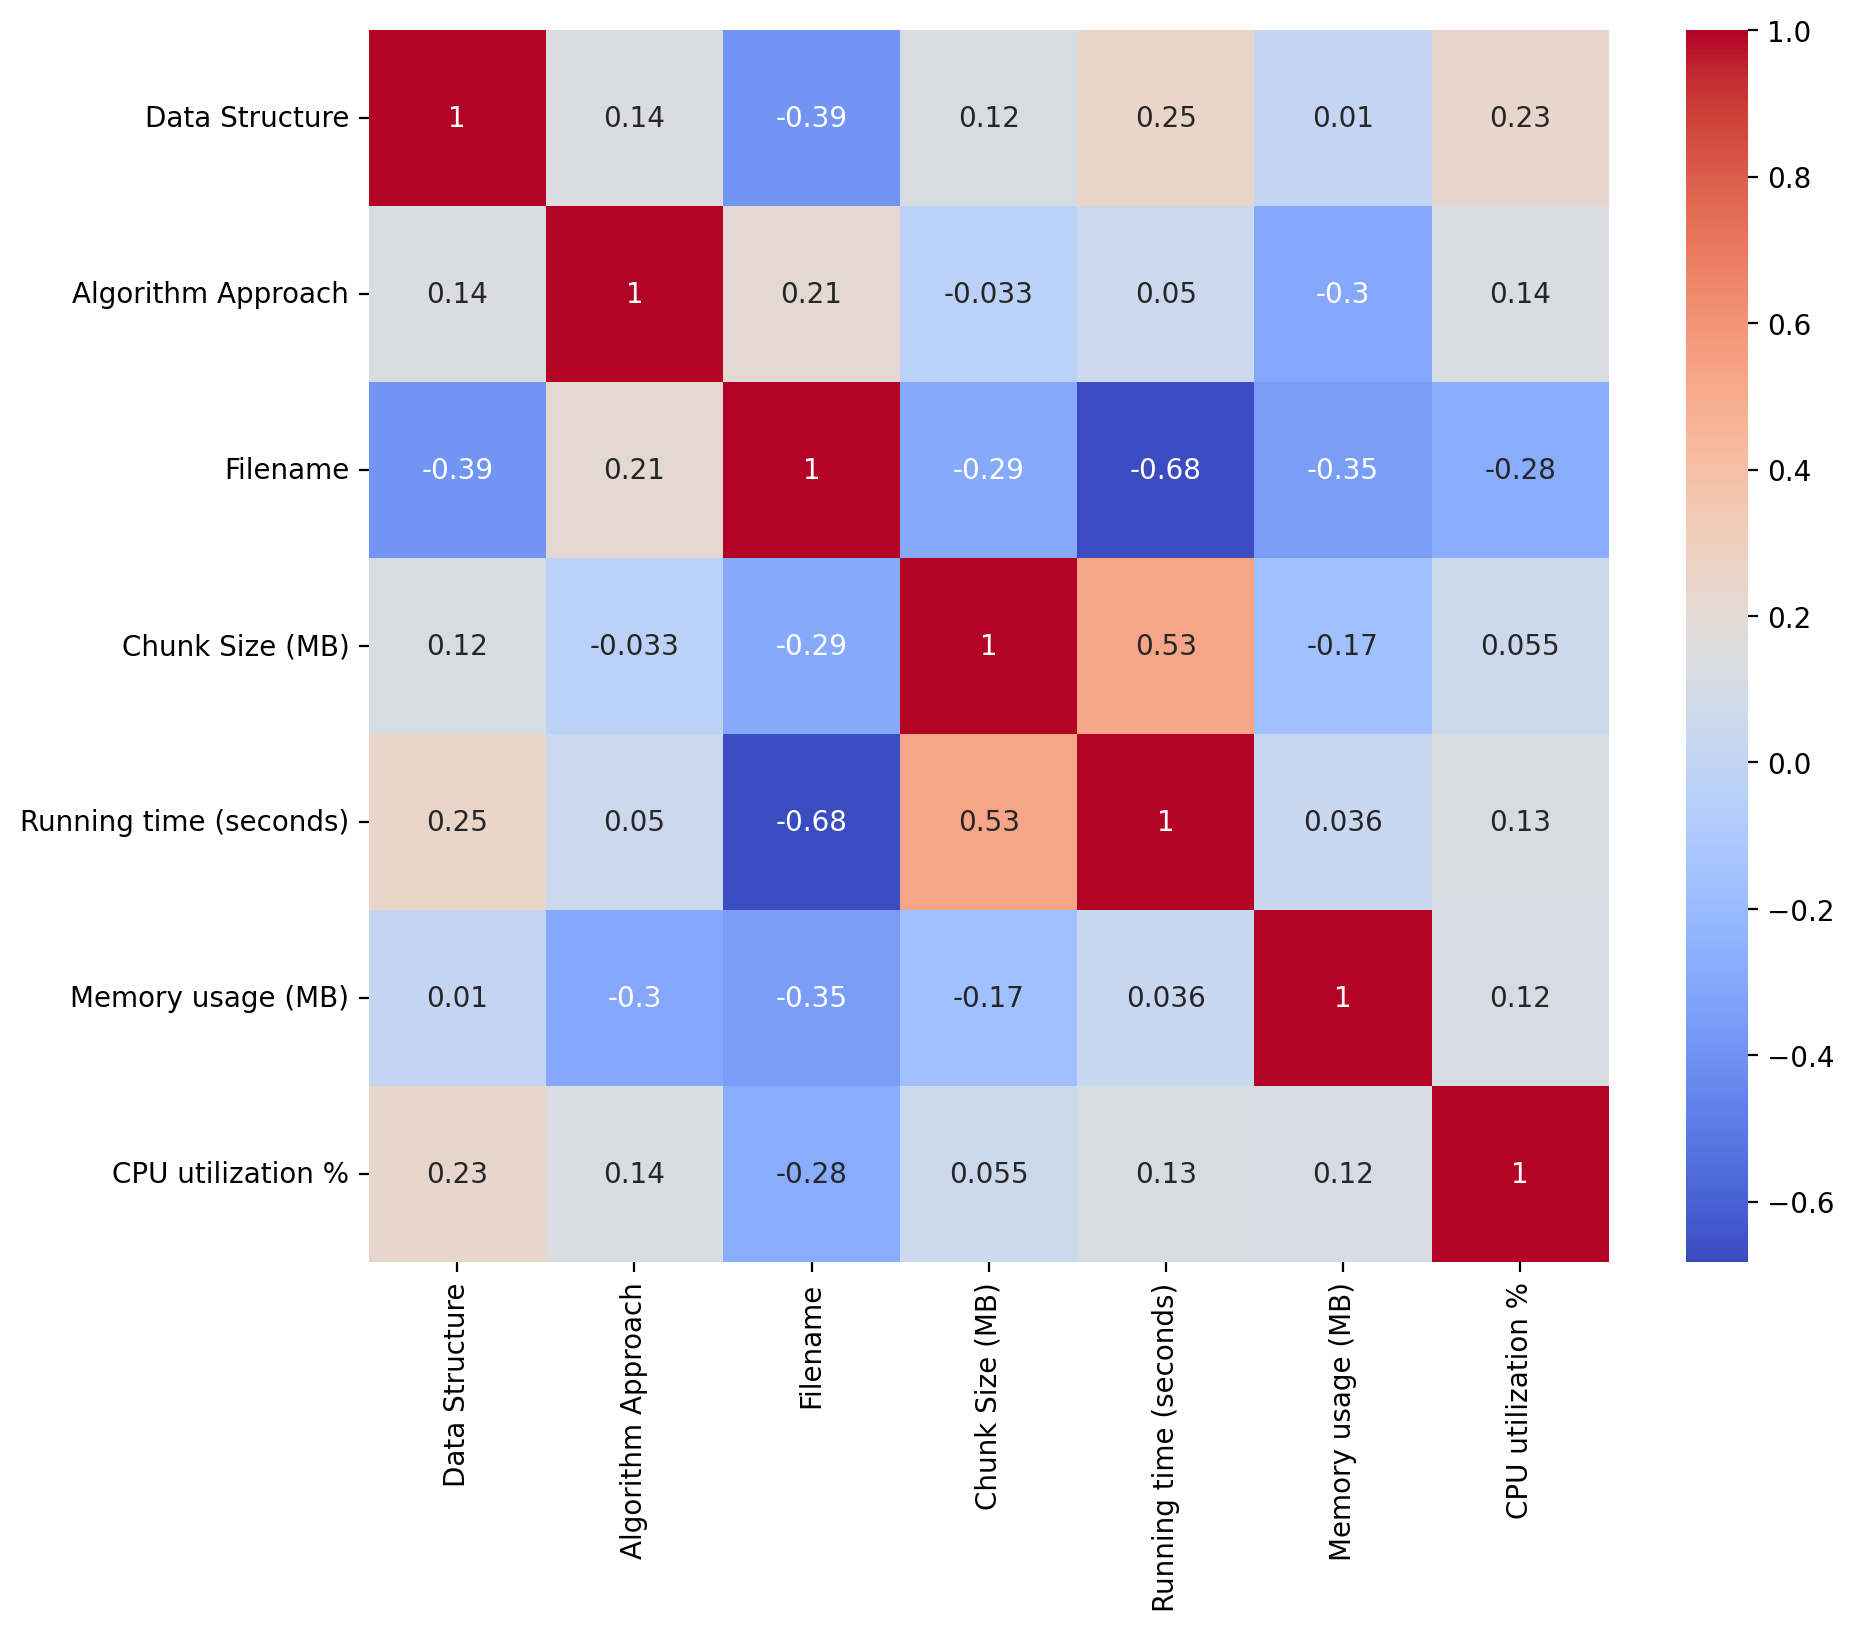

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


* File Size (GB) and Running time (seconds) have a strong positive correlation of 0.76, meaning that as the file size increases, the running time tends to increase as well.
* Memory usage (MB) and CPU utilization % have a strong negative correlation of -0.19, meaning that as memory usage increases, CPU utilization tends to decrease.
* We can see that Memory usage (MB) has a weak positive correlation with File Size (GB) and Running time (seconds), which suggests that as the file size or running time increases, the memory usage may also increase slightly.
* Similarly, CPU utilization % has a weak negative correlation with Algorithm Approach, suggesting that more complex algorithms may result in lower CPU utilization.

# Data Visualization

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# read the data from csv file
df = pd.read_csv('data.csv')

# group the DataFrame by Filename, Algorithm Approach, and Data Structure
groups = df.groupby(['Filename', 'Algorithm Approach', 'Data Structure'])

# iterate over the groups and create a clustered bar graph for each group
for name, group in groups:
    # create a pivot table with Chunk Size (MB) as rows and Running time (seconds), Memory usage (MB), and CPU utilization % as columns
    pivot_table = group.pivot(index='Chunk Size (MB)', columns='Metric', values='Value')
    
    # plot the pivot table as a clustered bar graph
    pivot_table.plot(kind='barh', stacked=True)
    
    # set the title and axis labels
    plt.title(f"Filename={name[0]}, Algorithm Approach={name[1]}, Data Structure={name[2]}")
    plt.xlabel("Metric value")
    plt.ylabel("Chunk Size (MB)")
    
    # show the plot
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

# Top 5 words

In [109]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# define data
data = {

    '50 MB dataset': {
        'us': 23246,
        'would': 22614,
        'countries': 21079,
        'world': 20052,
        'one': 17000
    },
    '16 GB dataset': {
        'said': 16983047,
        'would': 5829171,
        'one': 5827883,
        'new': 5619285,
        'also': 4618289
    },
    '300 MB dataset': {
        'european': 318829,
        'mr': 210735,
        'would': 181957,
        'also': 180186,
        'commission': 172844
    },
    '2.5 GB dataset': {
        'said': 2616266,
        'one': 949555,
        'would': 917212,
        'new': 852822,
        'also': 727934
    }
}

# plot word clouds and print counts
for filename, word_counts in data.items():
    print(f'Top 5 words in {filename}:')
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'Top 5 words in {filename}')
    plt.axis('off')
    plt.tight_layout(pad=0)
    # add legend
    items = list(word_counts.items())
    legend = "\n".join([f"{item[0]}:{item[1]}" for item in items])
    plt.text(1.1, 0.5, legend, transform=plt.gca().transAxes, ha="left", va="center")
    
plt.show()


ModuleNotFoundError: No module named 'wordcloud'